In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to ignore or disabled warnings
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/advertising-dataset/advertising.csv


# Read datasets

In [2]:
df=pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
print('length of Data',len(df))

length of Data 200


In [3]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Exploratory Data Analysis

**What is EDA on dataset?**

Exploratory Data Analysis (EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# checking for unique values
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [6]:
# checking for null values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
#view some basic statistical details like percentile, mean, std, etc.
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**visualize and analyze the columns**

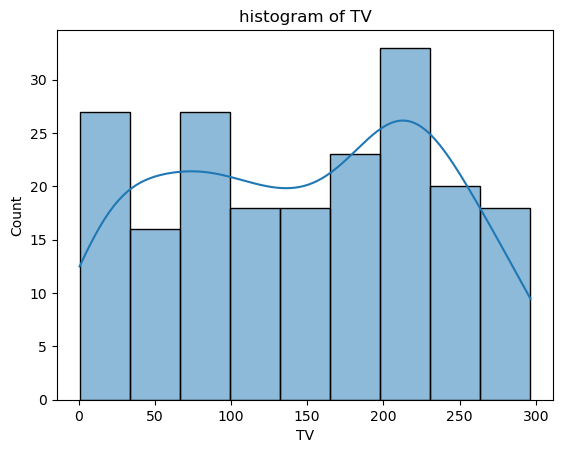

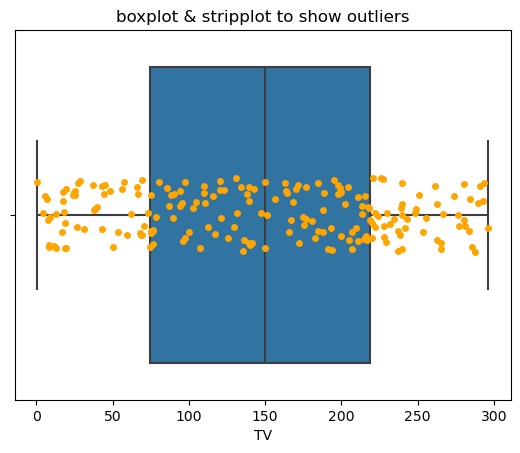

In [8]:
# indepebdent column TV
sns.histplot(data=df,x='TV',kde=True)
plt.title("histogram of TV" )
plt.show()

# note we haven't outlier in TV
sns.boxplot(x='TV', data=df)
sns.stripplot(x='TV', data=df, color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

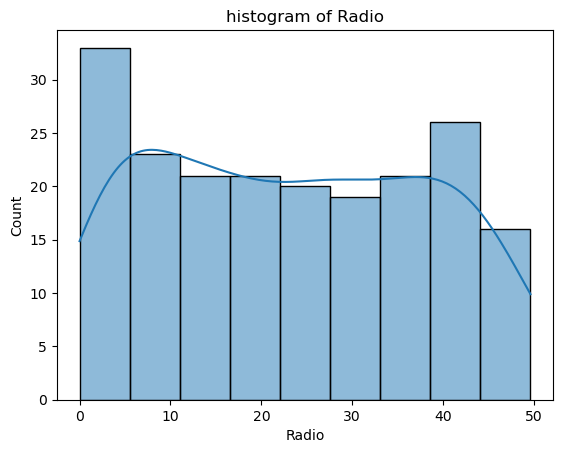

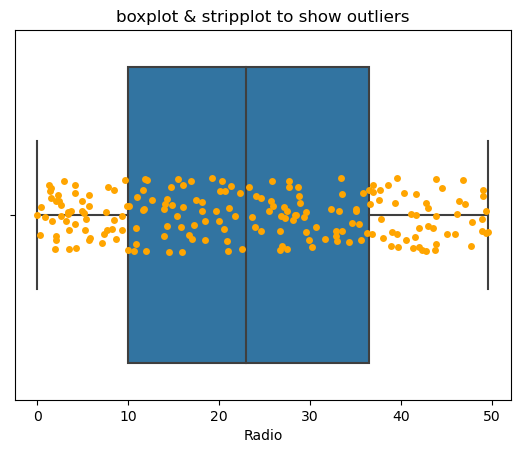

In [9]:
# indepebdent column Radio
sns.histplot(data=df,x='Radio',kde=True)
plt.title("histogram of Radio" )
plt.show()

# note we haven't outlier in Radio
sns.boxplot(x='Radio', data=df)
sns.stripplot(x='Radio', data=df, color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

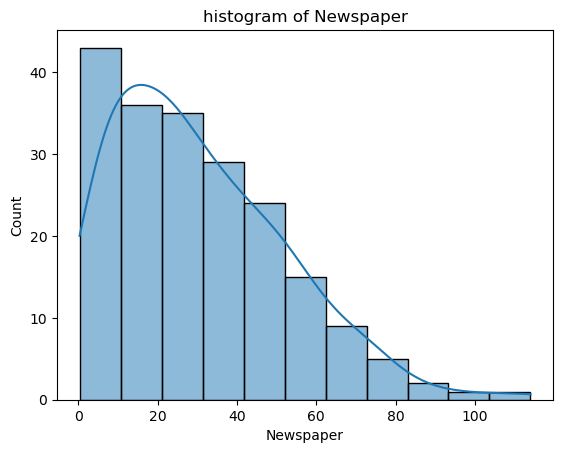

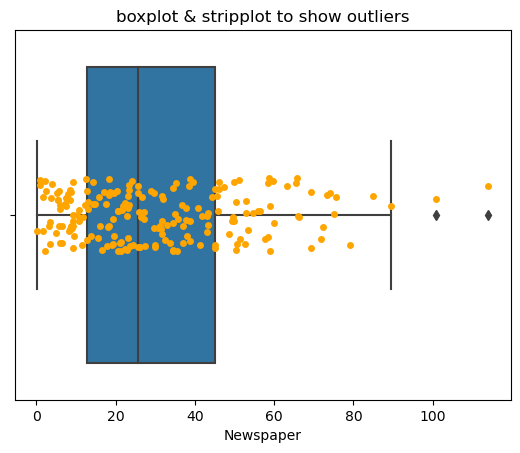

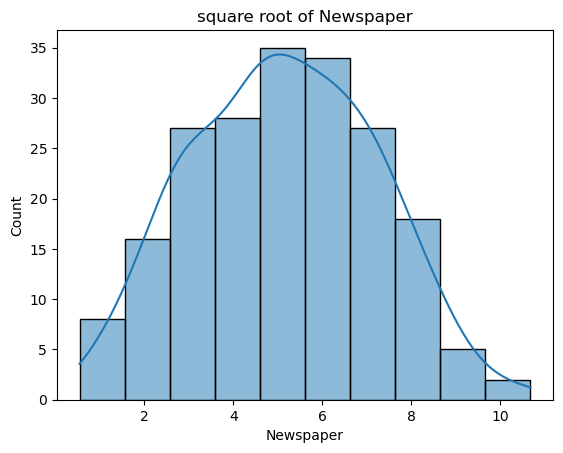

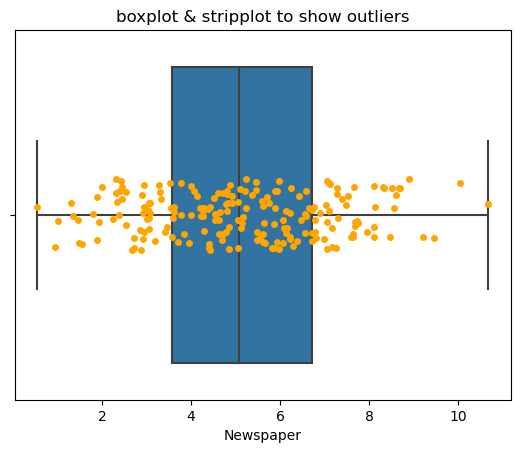

In [10]:
# indepebdent column Newspaper
sns.histplot(data=df,x='Newspaper',kde=True)
plt.title("histogram of Newspaper" )
plt.show()

# note we have outlier in Newspaper
sns.boxplot(x='Newspaper', data=df)
sns.stripplot(x='Newspaper', data=df, color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

# square root to normalize the distribution
sns.histplot(np.sqrt(df['Newspaper']),kde=True)
plt.title("square root of Newspaper" )
plt.show()

# After we transformed the data, the outliers disappeared
sns.boxplot(x=np.sqrt(df['Newspaper']), data=df)
sns.stripplot(x=np.sqrt(df['Newspaper']), data=df, color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

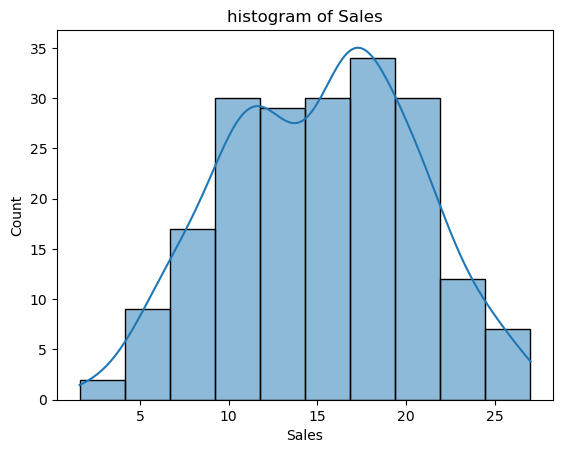

In [11]:
# depebdent column Sales
sns.histplot(data=df,x='Sales',kde=True)
plt.title("histogram of Sales" )
plt.show()

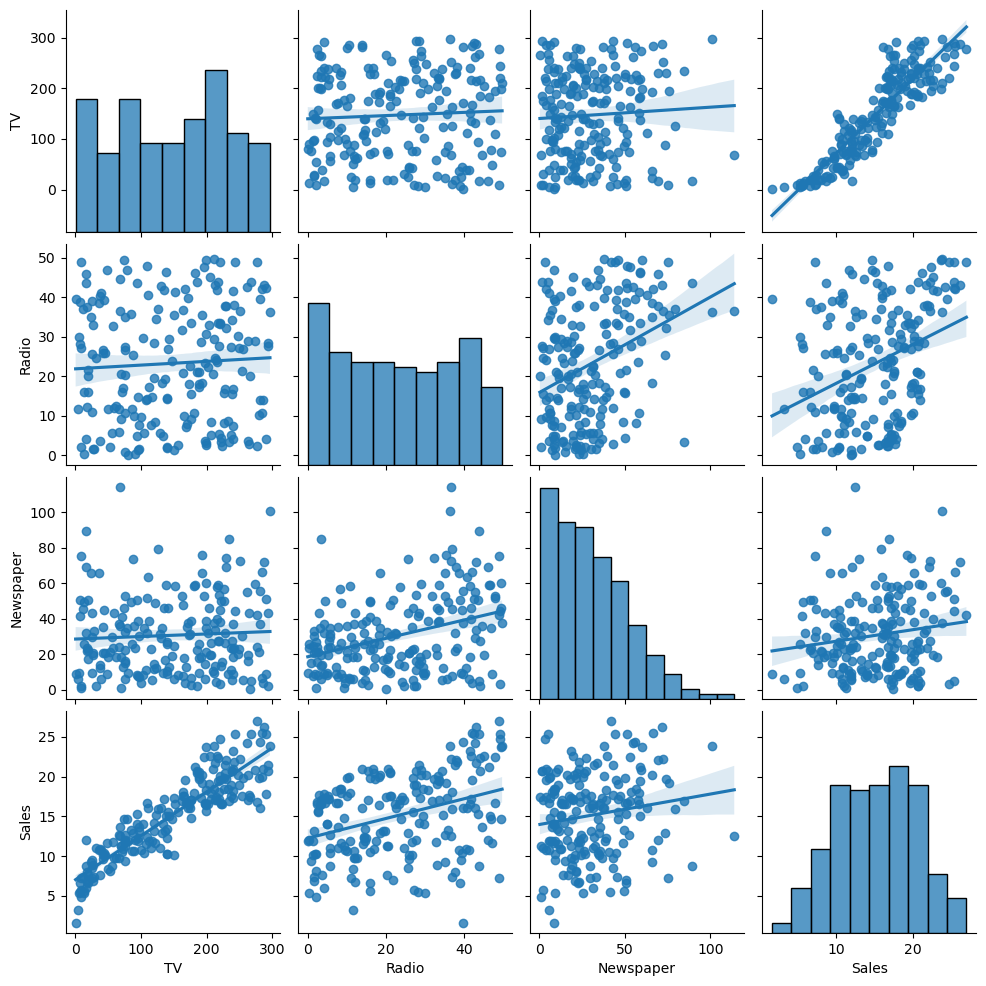

In [12]:
# discover the relationships between features 
sns.pairplot(data=df,kind='reg')
plt.show()

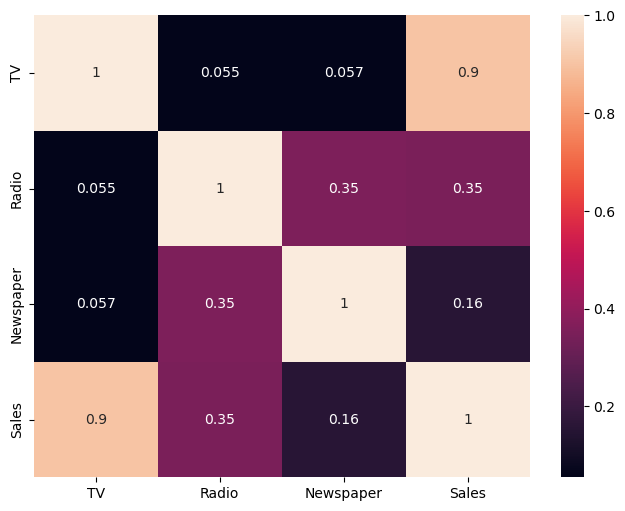

In [13]:
# show correlation between columns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Split data set

We will split data set into train set and test set

**Note**: Firstly we had split the data set to prevent of the data leaking to model


In [14]:
X = df.drop('Sales',axis=1)
y= df[['Sales']]

**Note**:we will take 160 rows for trainset and 40 rows for testset

In [15]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size= 0.20, random_state= 0)

In [16]:
print('no of rows for trainset is',len(X_Train))
print('no of rows for testset is',len(X_Test))

no of rows for trainset is 160
no of rows for testset is 40


# Data preprocessing
**What is preprocessing on dataset?**

In Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.

In [17]:
X_Train.head()

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


**Note**: Depending on the visualization in the EDA step, we have outliers in Newspaper features

In [18]:
#what is for outliers in Newspaper
mean_humidity=X_Train['Newspaper'].mean()
std_humidity=X_Train['Newspaper'].std()
X_Train[X_Train['Newspaper']> mean_humidity+3*std_humidity]

,TV,Radio,Newspaper
101,296.4,36.3,100.9


In [19]:
X_Train[X_Train['Newspaper']< mean_humidity-3*std_humidity]

,TV,Radio,Newspaper


**how to handel outliers?**

1. **Removal**: but i not prefare that because the data set is very small.
2. **clipping :** clipping is a technique that replaces extreme data points with less extreme values.
3. **Transformation:** Transforming the data can help to reduce the influence of outliers. For example, taking the logarithm or square root of the data may help to reduce the impact of extreme values. its type of features engneering technique

**Note**: we will use Transformation technique

In [20]:
# square root transformation on Newspaper column
X_Train['sqrt_Newspaper']=np.sqrt(X_Train['Newspaper'])
X_Test['sqrt_Newspaper']=np.sqrt(X_Test['Newspaper'])

In [21]:
X_Train.head()

,TV,Radio,Newspaper,sqrt_Newspaper
134,36.9,38.6,65.6,8.099383
66,31.5,24.6,2.2,1.483240
26,142.9,29.3,12.6,3.549648
113,209.6,20.6,10.7,3.271085
168,215.4,23.6,57.6,7.589466


In [22]:
X_Train.drop('Newspaper',axis=1,inplace=True)
X_Test.drop('Newspaper',axis=1,inplace=True)

In [23]:
X_Test.head()

,TV,Radio,sqrt_Newspaper
18,69.2,20.5,4.277850
170,50.0,11.6,4.289522
107,90.4,0.3,4.816638
98,289.7,42.3,7.155418
177,170.2,7.8,5.932959


# regression and evaluation Models

**Evaluation metric R2_score and MSE Mean Square  Error**

R2 score is indeed used to evaluate the overall goodness of fit of a regression model, while MSE is commonly used as a loss function during the training process of regression models.


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score,mean_squared_error

**Linear regression**
is a type of supervised learning algorithm in machine learning that is used to predict a continuous target variable based on one or more predictor variables. The goal of linear regression is to find the best fit line that describes the linear relationship between the predictor variables and the target variable.

In [25]:
model = LinearRegression()
model.fit(X_Train, y_Train)
y_train_predict = model.predict(X_Train)
y_test_predict = model.predict(X_Test)

r2_train = r2_score(y_Train, y_train_predict)
r2_test = r2_score(y_Test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

train_mse = mean_squared_error(y_Train, y_train_predict)
test_mse = mean_squared_error(y_Test, y_test_predict)
print("MSE of trainset:",train_mse)
print("MSE of testset:",test_mse)

r2 on trainset: 0.9132307543330083
r2 on testset: 0.8640549490858899
MSE of trainset: 2.267017336108329
MSE of testset: 4.537587503916259


**Polynomial regression**

Polynomial regression can be useful when the relationship between the predictor variable(s) and the target variable is not strictly linear, but has a curved shape.

In [26]:
poly_features = PolynomialFeatures(degree=2)
poly_features.fit(X_Train)
X_train_poly = poly_features.transform(X_Train)
X_test_poly = poly_features.transform(X_Test)

In [27]:
model = LinearRegression()
model.fit(X_train_poly, y_Train)
y_train_predict = model.predict(X_train_poly)
y_test_predict = model.predict(X_test_poly)

r2_train = r2_score(y_Train, y_train_predict)
r2_test = r2_score(y_Test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

train_mse = mean_squared_error(y_Train, y_train_predict)
test_mse = mean_squared_error(y_Test, y_test_predict)
print("MSE of trainset:",train_mse)
print("MSE of testset:",test_mse)

r2 on trainset: 0.9384823620603061
r2 on testset: 0.9181110144409983
MSE of trainset: 1.607269379993869
MSE of testset: 2.7332987488869156
